### 1.Import necessary libraries

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

### 2.Load dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### 3.Expolarity data analysis

In [7]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


there is not null values and only one categoricl variable (Gender) and 4 numerical variable

analysis numerical variables

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


explor correlation between numerical variables

In [14]:
data = df.drop(['Gender'],axis=1)

In [15]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\شروق عادل\AppData\Local\Temp\ipykernel_8640\294867045.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


Text(0, 0.5, 'Count')

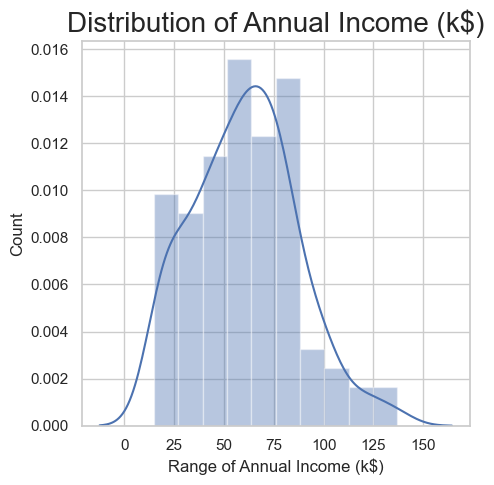

In [21]:
# distribution of annual income
plt.figure(figsize=(5,5))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)',fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\شروق عادل\AppData\Local\Temp\ipykernel_8640\1133409275.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

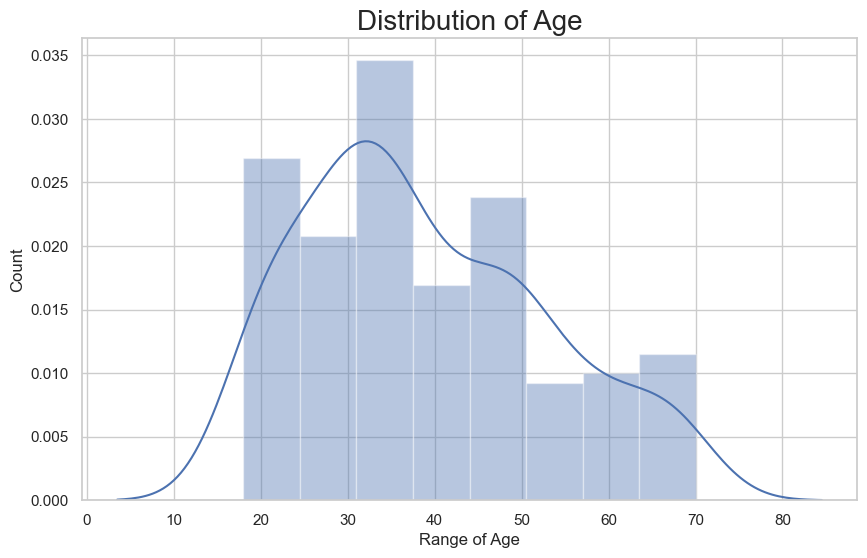

In [23]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

distribution of Gender

In [26]:
gender = df.Gender.value_counts()
gender

Gender
Female    112
Male       88
Name: count, dtype: int64

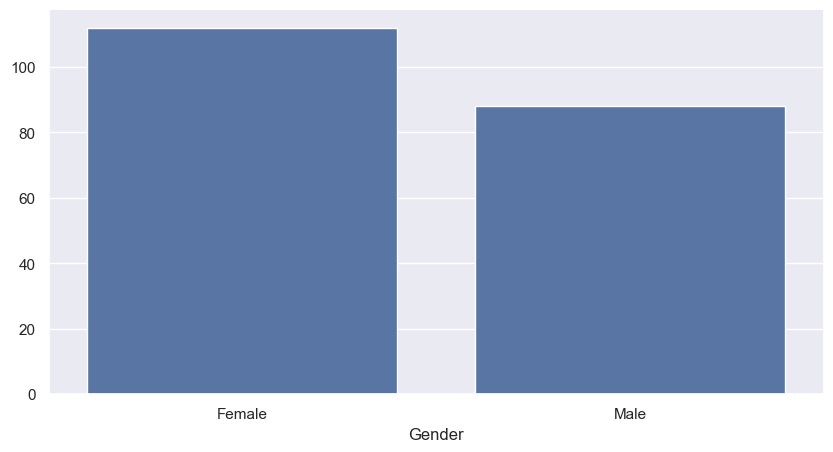

In [30]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x=gender.index,y=gender.values)
plt.show()
 

Tacking the features 'Annual Income (k$)','Spending Score (1-100)' for clustring

In [31]:
x =df[['Annual Income (k$)','Spending Score (1-100)']]

In [32]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


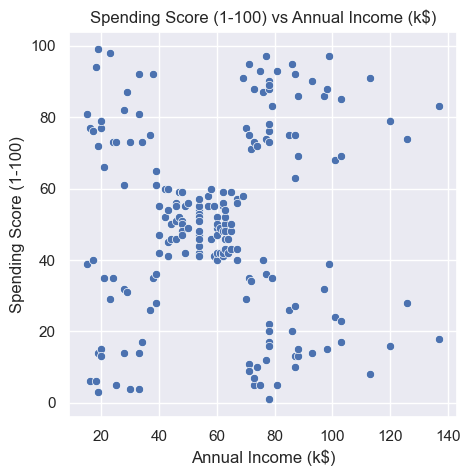

In [34]:
# scatter plot of input data
plt.figure(figsize=(5,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data= x)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### 4.kmean clustring algorithm

In [36]:
wcss=[] # Within-Cluster Sum of Squares
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)


e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

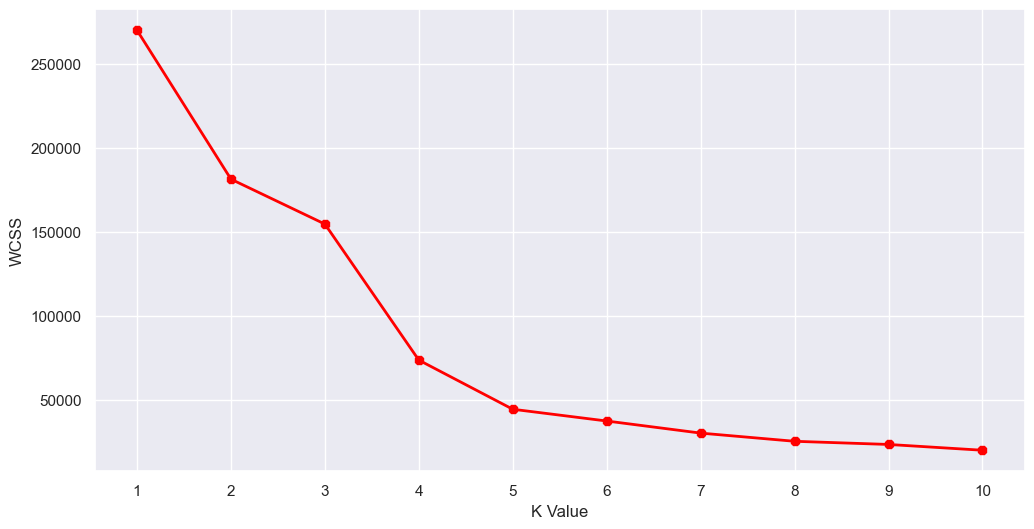

In [42]:
# the elbow curve 
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [43]:
# Tacking 5 cluster
km1 = KMeans(n_clusters=5)
km1.fit(x)
# predicting the labels of the input data
y = km1.predict(x)
# adding the label to the column called label
df['label']=y
df.head()

e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


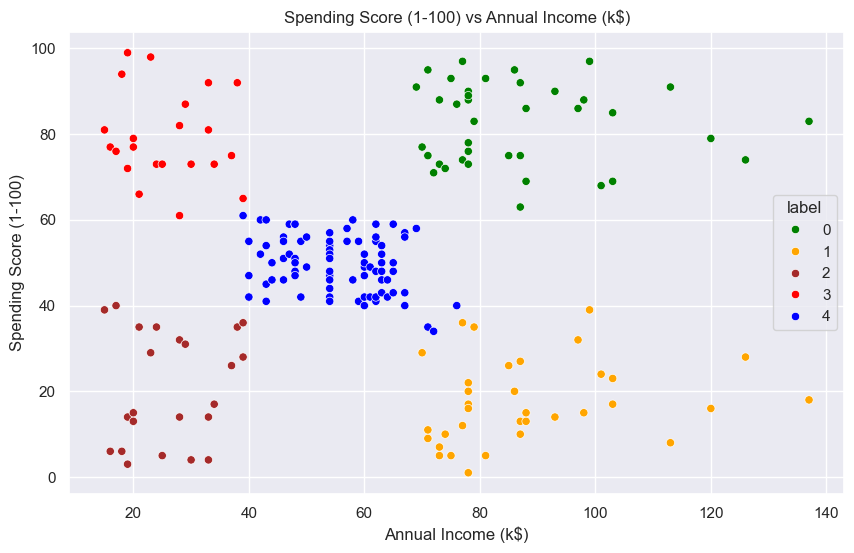

In [49]:
# plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='label',palette=['green','orange','brown','red','blue']
                ,legend='full',data=df) # hue='label': This defines a variable used to color the data points 
                                        # in the scatterplot. Here, it will use the "label" column from your data frame to assign colors.
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Tacking the features 'Annual Income (k$)','Spending Score (1-100)', 'Age' for clustring

In [50]:
x1=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [51]:
x1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

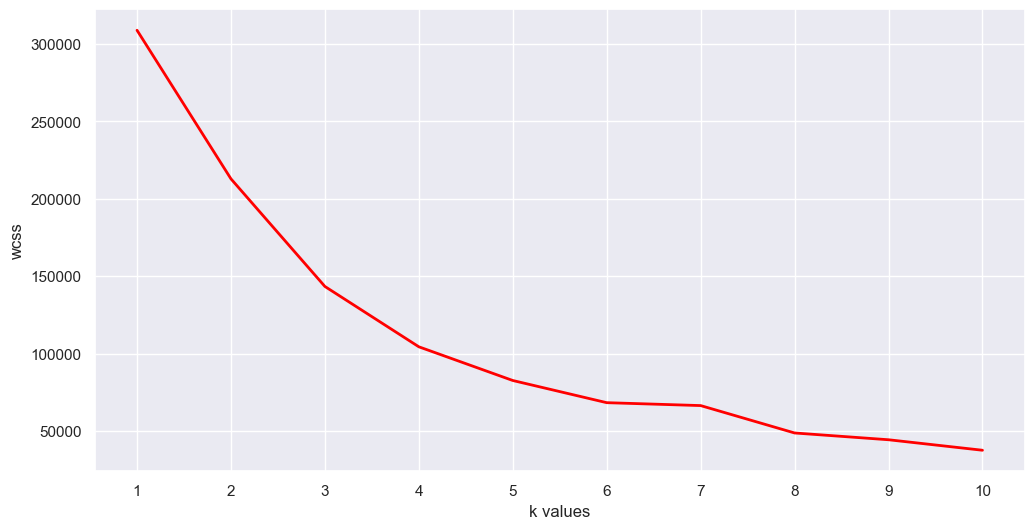

In [53]:
wcss =[]
for i in range(1,11):
    km2=KMeans(n_clusters=i)
    km2.fit(x1)
    wcss.append(km2.inertia_)

# plot elbow
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,linewidth =2,color='red')
plt.xlabel('k values')
plt.xticks(np.arange(1,11))
plt.ylabel('wcss')
plt.show()

In [54]:
# we choose k= 5 for clustring 
Km2=KMeans(n_clusters=5)
Km2.fit(x1)
y = Km2.predict(x1)

e:\anaconda\envs\new\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
df1=df.drop(['label'],axis=1)
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
df1['label']=y

In [58]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [59]:
df1.label.value_counts()

label
1    76
3    39
0    37
2    25
4    23
Name: count, dtype: int64

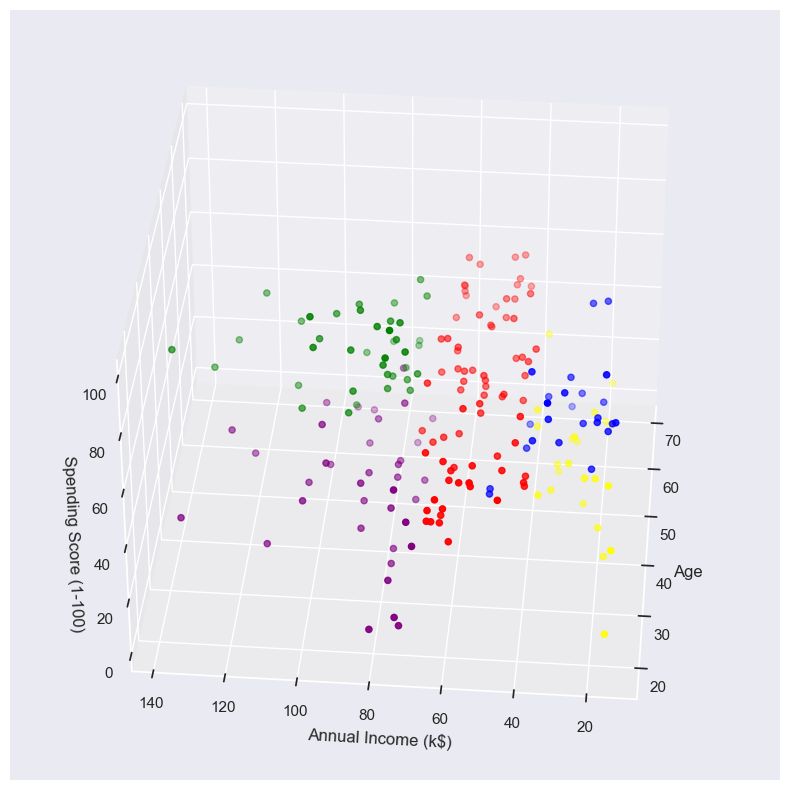

In [66]:
# 3D scatter cuslteers
fig = plt.figure(figsize=(20,10))
# The first argument, 111, specifies a single subplot layout (one row, one column, and the first plot).
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df1.Age[df1.label == 0],df1['Annual Income (k$)'][df1.label == 0],df1['Spending Score (1-100)'][df1.label ==0],c='purple')
ax.scatter(df1.Age[df1.label == 1],df1['Annual Income (k$)'][df1.label == 1],df1['Spending Score (1-100)'][df1.label ==1],c='red')
ax.scatter(df1.Age[df1.label == 2],df1['Annual Income (k$)'][df1.label == 2],df1['Spending Score (1-100)'][df1.label ==2],c='blue')
ax.scatter(df1.Age[df1.label == 3],df1['Annual Income (k$)'][df1.label == 3],df1['Spending Score (1-100)'][df1.label ==3],c='green')
ax.scatter(df1.Age[df1.label == 4],df1['Annual Income (k$)'][df1.label == 4],df1['Spending Score (1-100)'][df1.label ==4],c='yellow')
ax.view_init(35, 185) #ax.view_init(35, 185) is used to set the viewpoint for your 3D plot created with Matplotlib
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [71]:
cust1=df1[df1["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 37
They are - [125 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161
 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197
 199]
--------------------------------------------
Number of customer in 2nd group= 76
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 127]
--------------------------------------------
Number of customer in 3rd group= 25
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 66
 69]
--------------------------------------------
Number of customer in 4th group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190